# Question 1 : Customer Footfall Count

I struggled with the actual implementation of this algorithm.  As such, I shall instead provide an overlook on the type of algorithm I attempted to implement.  

1) Recognise people

We need to slice the video in n still frames with each interval being a δ time difference from the last.  From this, we should be able to run a neural network that was pretrained to learn faces of humans.  This was the part that tripped me up as i was not able to find models that were pretrained in this regard.  while running that model on the still image, we can count how many people there are and running in n times for all the frames, we can measure the movement of each person

2) Inside or out of a store

Again, divide the image in n still frames.  Around the store in question, create a boundary.  Using the previously mentioned people tracking algorithm, we can check how many people crossed the boundary


# Question 2 : Vehicle Identification

I have previously attempted this question while part of Sunway Embark, hence as opposed to the other question, for this part i have inserted a link to the goolge drive folder that has the full algorithm as well various data sets which my team and i collected, preprocessed and clean.  My hope with this ans is to show the complete workflow i.e. from data collection, data cleaning and partitioning and finally running of the algorithm.

The overarching way this question was answered is firstly, we should be able to tell that there is a car in the picture.  From here, we can also get information like the colour of the car.  After we know a car is present, we can then determine the model of the car.  We can use pretrained models for this purpose.  After that, we can cross referance the pretrained models with a list of models that are EV or non EV to be able to tell if the vehicle is EV or not

Question 2

[link text](https://blog.roboflow.com/object-tracking-how-to/)

# Question 3 : Vehicle Tracking

Question 2

Using a pretrained model from robo-flow we can output the number of cars

In [ ]:
!git clone https://github.com/roboflow-ai/zero-shot-object-tracking

Cloning into 'zero-shot-object-tracking'...
remote: Enumerating objects: 454, done.
remote: Total 454 (delta 0), reused 0 (delta 0), pack-reused 454
Receiving objects: 100% (454/454), 88.00 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
%cd zero-shot-object-tracking

/content/zero-shot-object-tracking/zero-shot-object-tracking


In [ ]:
!ls data/video

cars.mp4  fish.mp4  test.mp4


In [ ]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public('data/video/cars.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
!git clone https://github.com/openai/CLIP.git CLIP-repo
!cp -r ./CLIP-repo/clip ./clip

Cloning into 'CLIP-repo'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 195 (delta 12), reused 22 (delta 9), pack-reused 168
Receiving objects: 100% (195/195), 8.91 MiB | 30.61 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
!pip install --upgrade pip
!pip install -r requirements.txt
!pip install ftfy

  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Using cached pandas-1.3.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached ftfy-6.0.3.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement regex==2.5.86 (from versions: 2013-02-16, 2013-02-23, 2013-03-11, 2013-05-21, 2013-06-05, 2013-06-26, 2013-08-04, 2013-10-04, 2013-10-12, 2013-10-21, 2013-10-22, 2013-10-23, 2013-10-24, 2013-10-25, 2013-10-26, 2013-11-29, 2013-12-31, 0.1.20100217, 0.1.20100226, 0.1.20100305, 0.1.20100323, 0.1.20100331, 0.1.20100706, 0.1.20100706.1, 0.1.20100709, 0.1.20100709.1, 0.1.20100719, 0.1.20100725, 0.1.20100814, 0.1.20100816, 0.1.20100824, 0.1.20100912, 0.1.20100913, 0.1.20100918, 0.1.20101009, 0.1.201

In [ ]:
!python clip_object_tracker.py --source ./data/video/cars.mp4 --detection-engine yolov5 

Namespace(agnostic_nms=False, api_key=None, augment=False, cfg='yolov4.cfg', classes=None, confidence=0.4, detection_engine='yolov5', device='', exist_ok=False, img_size=640, info=False, max_cosine_distance=0.4, name='exp', names='coco.names', nms_max_overlap=1.0, nn_budget=None, overlap=0.3, project='runs/detect', save_conf=False, save_txt=False, source='./data/video/cars.mp4', thickness=3, update=False, url=None, view_img=False, weights='yolov5s.pt')
100% 14.5M/14.5M [00:00<00:00, 98.0MB/s]

Fusing layers... 
Using torch 1.10.0+cu111 CPU

video 1/1 (1/266) /content/zero-shot-object-tracking/zero-shot-object-tracking/data/video/cars.mp4: yolov5 inference
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

[Detections]
1 persons,

In [ ]:
from google.colab import files 
files.download("./runs/detect/exp/cars.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 4 : Image Denoising

Question 4

In the previous question, I used a pretrained model.  In this question, to show variety, I trained my own model.  The idea to clean the image is to use the baseline images to construct and autoencoder.  Using the autoencoder as a lense, we could then get clearer images.  I used the mnist data set


In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
dimension = x_train.shape[1]

In [ ]:
num_data = 1000
frac_train = 0.7
frac_test = 0.3
x_train = x_train[0:int(frac_train*num_data)]
x_test = x_test[0:int(frac_test*num_data)]

In [ ]:
norm_factor = 255.
x_train = x_train.astype('float32')/norm_factor
x_test = x_test.astype('float32')/norm_factor
x_train = np.reshape(x_train, (len(x_train), dimension, dimension, 1))
x_test = np.reshape(x_test, (len(x_test), dimension, dimension, 1))

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

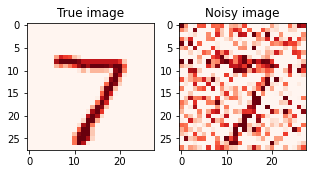

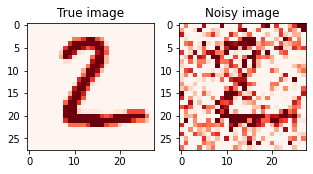

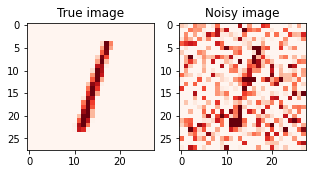

In [ ]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 5)
    axes[0].set_title('True image')
    im0 = axes[0].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds')
    axes[1].set_title('Noisy image')
    im1 = axes[1].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds')

In [ ]:
input_img = keras.Input(shape = (dimension, dimension, 1))

In [ ]:
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(input_img)
x = layers.MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)

In [ ]:
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(encoded)
x = layers.UpSampling2D(size = (2, 2))(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D(size = (2, 2))(x)
decoded = layers.Conv2D(filters = 1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same')(x)

In [ ]:
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

Adam is basically a stochastic gradient traversal algorithm

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
validation_split = 0.8
history = autoencoder.fit(x_train_noisy, x_train, epochs = 40, batch_size = 20, shuffle = True, validation_split = validation_split)

Epoch 1/40
7/7 [==============================] - 4s 321ms/step - loss: 0.5921 - val_loss: 0.5047
Epoch 2/40
7/7 [==============================] - 1s 112ms/step - loss: 0.5021 - val_loss: 0.4736
Epoch 3/40
7/7 [==============================] - 1s 108ms/step - loss: 0.4669 - val_loss: 0.4426
Epoch 4/40
7/7 [==============================] - 1s 166ms/step - loss: 0.4298 - val_loss: 0.4030
Epoch 5/40
7/7 [==============================] - 1s 110ms/step - loss: 0.3830 - val_loss: 0.3495
Epoch 6/40
7/7 [==============================] - 1s 113ms/step - loss: 0.3227 - val_loss: 0.2876
Epoch 7/40
7/7 [==============================] - 1s 112ms/step - loss: 0.2660 - val_loss: 0.2426
Epoch 8/40
7/7 [==============================] - 1s 111ms/step - loss: 0.2321 - val_loss: 0.2236
Epoch 9/40
7/7 [==============================] - 1s 111ms/step - loss: 0.2191 - val_loss: 0.2166
Epoch 10/40
7/7 [==============================] - 1s 111ms/step - loss: 0.2098 - val_loss: 0.2109
Epoch 11/40
7/7 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

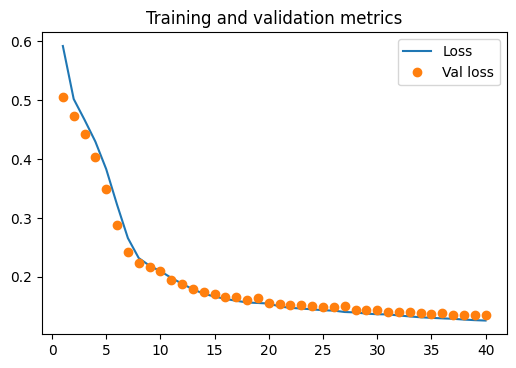

In [ ]:
plt.figure(dpi = 100)
plt.plot(epochs, train_loss, label = 'Loss')
plt.plot(epochs, train_val_loss, 'o', label = 'Val loss')
plt.title('Training and validation metrics')
plt.legend()
plt.savefig('history.png')

In [ ]:
all_denoised_images = autoencoder.predict(x_test_noisy)

In [ ]:
test_loss  = autoencoder.evaluate(x_test_noisy, x_test, batch_size = 20)
test_loss

15/15 [==============================] - 0s 14ms/step - loss: 0.1312


0.1312047392129898

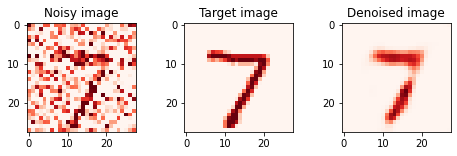

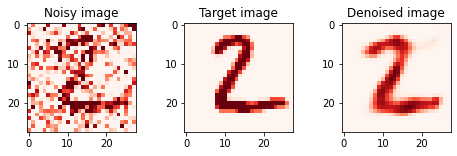

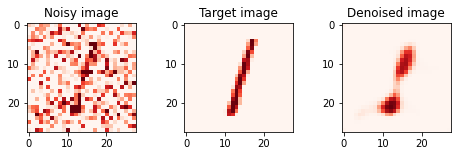

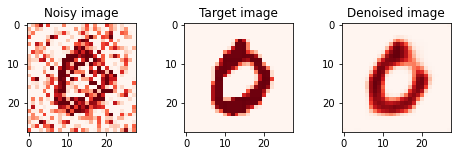

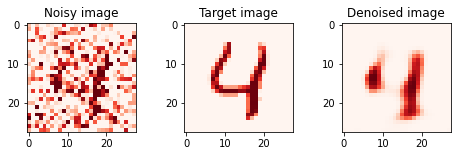

In [ ]:
n = 5
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds')
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds')
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds')
    plt.savefig(f'comparison-{i}.png')

# Question 5 : Data Cleaning

For this question, firstly i uploaded the csv files to my google drive.  Then for data cleaning, i iterated through each element of the list and remvoed the unrelated characters which i assumed are typos.  To find the correlation, i realised that the id is unique to each person and ran a correlation matrix between the 2 datasets

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

loyaltyFileName = "/content/drive/MyDrive/Colab Notebooks/loyalty.csv"
transactionFileName = "/content/drive/MyDrive/Colab Notebooks/transactions.csv"
loyaltyDF = pd.read_csv(loyaltyFileName)
transactionDF = pd.read_csv(transactionFileName)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
loyaltyDF.head()

,name,city,phone-number,license-plate,email,id
0,Gary Cannon,Pric#%edale,339-486-5500,BOB-0788,Gar#%y_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853
1,Brian Montes,Rosebud,336-853-9842,AXI-4190,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e
2,Christopher[ Todd Jr.,Llano.,1 59#%-161-0094,LRM-754,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3
3,Lynn Blake,Greenbank,174-4]98-313]0,MRW -4495,Blake_Lynn45@zoho. com,15abb55d-ec36-4b88-bba2-a58af8accd81
4,Jennifer Allen,S.N.P.J.,/240-375121-3895,HBI-2202,Je nnifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0


In [ ]:
forbidenChar = [" ", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", 
                "+", "=", "{", "}", "\ ","|", ";", ":", "' ", "<", ",", ">",
                ".", "?", "/", "~", "`", "[", "]"]
for items in forbidenChar:
  loyaltyDF["phone-number"] = loyaltyDF["phone-number"].str.replace(items, "")

loyaltyDF["phone-number"].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0       339-486-5500
1       336-853-9842
2       159-161-0094
3       174-498-3130
4    240-375121-3895
Name: phone-number, dtype: object

In [ ]:
forbidenChar = [" ", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", 
                "+", "=", "{", "}", "\ ","|", ";", ":", "' ", "<", ",", ">",
                ".", "?", "/", "~", "`", "[", "]"]
for items in forbidenChar:
  loyaltyDF["license-plate"] = loyaltyDF["license-plate"].str.replace(items, "")

loyaltyDF["license-plate"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    BOB-0788
1    AXI-4190
2     LRM-754
3    MRW-4495
4    HBI-2202
Name: license-plate, dtype: object

In [ ]:
forbidenChar = [" ", "!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", 
                "+", "=", "{", "}", "\ ","|", ";", ":", "' ", "<", ",", ">",
                "?", "/", "~", "`", "-", "[","]"]
for items in forbidenChar:
  loyaltyDF["city"] = loyaltyDF["city"].str.replace(items, "")

loyaltyDF["city"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0    Pricedale
1      Rosebud
2        Llano
3    Greenbank
4         SNPJ
Name: city, dtype: object

In [ ]:
forbidenChar = ["!", "@", "#", "$", "%", "^", "&", "*", "(", ")", "_", 
                "+", "=", "{", "}", "\ ","|", ";", ":", "' ", "<", ",", ">",
                "?", "/", "~", "`", "-", "[", "]"]
for items in forbidenChar:
  loyaltyDF["name"] = loyaltyDF["name"].str.replace(items, "")

loyaltyDF["name"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


0            GaryCannon
1           BrianMontes
2    ChristopherToddJr.
3             LynnBlake
4         JenniferAllen
Name: name, dtype: object

In [ ]:
loyaltyDF.head()

,name,city,phone-number,license-plate,email,id
0,GaryCannon,Pricedale,339-486-5500,BOB-0788,Gar#%y_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853
1,BrianMontes,Rosebud,336-853-9842,AXI-4190,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e
2,ChristopherToddJr.,Llano,159-161-0094,LRM-754,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3
3,LynnBlake,Greenbank,174-498-3130,MRW-4495,Blake_Lynn45@zoho. com,15abb55d-ec36-4b88-bba2-a58af8accd81
4,JenniferAllen,SNPJ,240-375121-3895,HBI-2202,Je nnifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0


In [128]:
transactionDF.head()

,name,city,phone-number,email,id,TransactionID,Amount
0,Gary Cannon,Pricedale,339-486-5500,Gary_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853,0,1372
1,Brian Montes,Rosebud,336-853-9842,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1,1779
2,Christopher Todd Jr.,Llano,159-161-0094,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3,2,11
3,Lynn Blake,Greenbank,174-498-3130,Blake_Lynn45@zoho.com,15abb55d-ec36-4b88-bba2-a58af8accd81,3,101
4,Jennifer Allen,S.N.P.J.,240-375-3895,Jennifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,4,1318


In [130]:
transactionDF = transactionDF.drop(transactionDF.columns[[0,1,2,3,4]], axis=1)

In [131]:
transactionDF.head()

,TransactionID,Amount
0,0,1372
1,1,1779
2,2,11
3,3,101
4,4,1318


In [132]:
result = pd.concat([loyaltyDF, transactionDF], axis=1)


In [133]:
result.head()

,name,city,phone-number,license-plate,email,id,TransactionID,Amount
0,GaryCannon,Pricedale,339-486-5500,BOB-0788,Gar#%y_C@verizon.com,d37a5246-6ca3-4ade-9472-d7671becc853,0,1372
1,BrianMontes,Rosebud,336-853-9842,AXI-4190,Brian.M@outlook.com,65ad4511-b6fd-4cf7-8520-7f3d68776e5e,1,1779
2,ChristopherToddJr.,Llano,159-161-0094,LRM-754,Christopher_Jr.@mail.com,45c97ee7-a932-459e-b0de-dd8160b3efe3,2,11
3,LynnBlake,Greenbank,174-498-3130,MRW-4495,Blake_Lynn45@zoho. com,15abb55d-ec36-4b88-bba2-a58af8accd81,3,101
4,JenniferAllen,SNPJ,240-375121-3895,HBI-2202,Je nnifer.Allen@yahoo.com,4b166f8d-ecab-43c5-ae0f-a09beb3ea4c0,4,1318


In [137]:
correlationMatrix = result.corr()
correlationMatrix

,TransactionID,Amount
TransactionID,1.000000,0.003752
Amount,0.003752,1.000000


In [138]:
print(result.var())

TransactionID    8.334167e+06
Amount           3.332203e+05
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


As to why I cleaned clean the dataset this way,  firstly it is to remove typos. I didnt use the same criteria on each column as some characters may be legal in 1 context but not another.  Next, I removed the repeated rows and joined the 2 data sets into 1.  This final data set is in the correct format to ensure that we can spot any patterns.  

To find any relation, we use Transaction ID and amount.  Transaction ID is a unique identifier of a transaction. hence it basically can be used to replace all of name, email, phone number, number plate and id since these are all unique identifiers of a person.  Firstly, given that the variance of both amount and transactionID are very high, it is safe to say that there does not exist any meaningful groupings of data points and given that, it is unsuprising to see that there is no correlation.  A business case of use would be to minimise awarding of loyalty points as now it seems that there is no correlation between loyalty status and expenditure.  